customer_spent_analysis_using_hierarchical.ipynb
By Kamal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded =files.upload()

Saving dataset.csv to dataset.csv


In [4]:
dataset = pd.read_csv('dataset.csv')

In [5]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(7))


(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
5           6  Fema

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score,Geneder
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
5,6,0,22,17,76,0
6,7,0,35,18,6,0


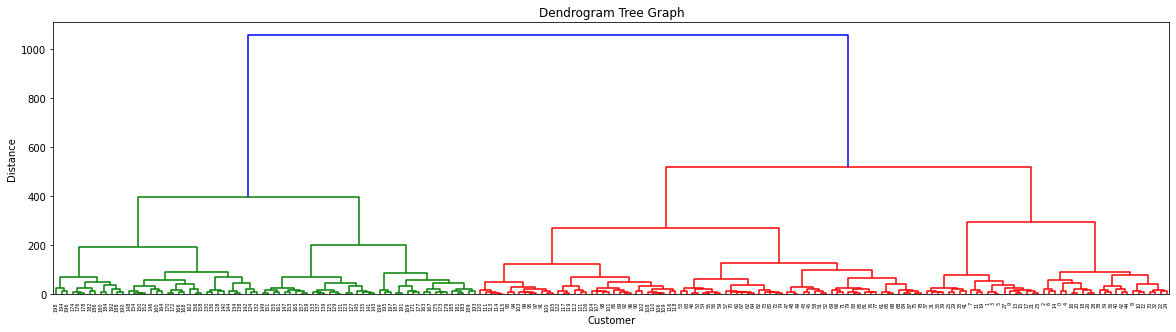

In [24]:
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (20, 5))
dendrogram = clus.dendrogram(clus.linkage(dataset, method = "ward"))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()


In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage ='average')
y_means = model.fit_predict(dataset)
y_means

array([8, 4, 2, 4, 8, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 6, 1, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 0, 6, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 9, 0, 9,
       0, 9])

Text(0, 0.5, 'Spent')

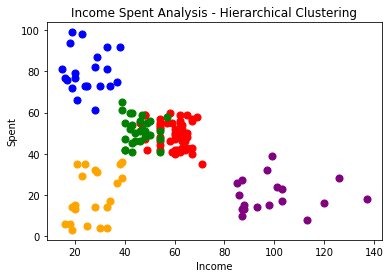

In [31]:
X = dataset.iloc[:, [3,4]].values
plt.scatter(X[y_means==0,0], X[y_means==0,1], s = 50, c='purple', label='cluster')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s = 50, c='red', label='cluster')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s = 50, c='orange', label='cluster')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s = 50, c='green', label='cluster')
plt.scatter(X[y_means==4,0], X[y_means==4,1], s = 50, c='blue', label='cluster')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')

### Visualizing the number of clusters n=5

Cluster 1: Customers with Medium Income and Medium Spending

Cluster 2: Customers with High Income and High Spending

Cluster 3: Customers with Low Income and Low Spending

Cluster 4: Customers with High Income and Low Spending

Cluster 5: Customers with Low Income and High Spending